<a href="https://colab.research.google.com/github/vedantgupta96/HelloWorldRepo/blob/master/CS286_IADSE_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


downloaded = drive.CreateFile({'id':'1q1Ha1e9K9VJD8nCeggB8VKD4jN9UJaIN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('IADSED.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


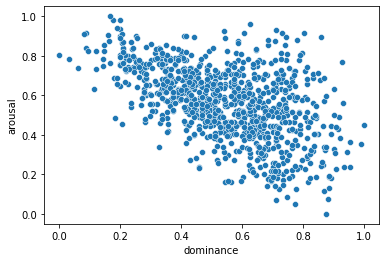

In [2]:
sound = pd.read_csv('IADSED.csv')
df = pd.DataFrame(sound)
nullCount = df.columns[df.isnull().any()]
# All the columns that have missing data are numeric, so I'm using the mean to fill the null values
df.fillna(df.mean(), inplace=True)
df_num = df.drop(df.loc[:, 'source':'BE_Classification'].columns, axis=1, inplace=False)
df.head()

# normalize the data attributes
scaler = MinMaxScaler()
scaledDf = pd.DataFrame(scaler.fit_transform(df_num),index=df_num.index, columns=df_num.columns) 

#fig, axs = plt.subplots(ncols=3,figsize=(90,20))
sns.scatterplot(data=scaledDf, x='dominance', y='arousal')


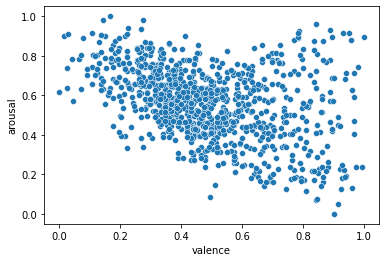

In [3]:
sns.scatterplot(data=scaledDf, x='valence', y='arousal')


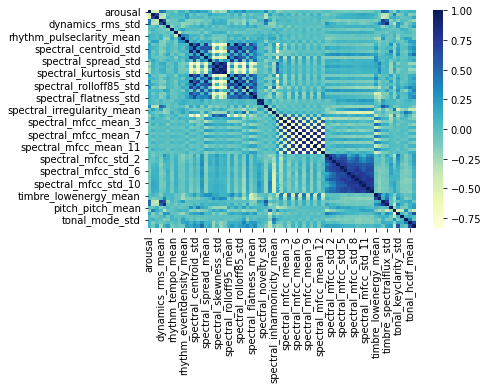

In [4]:
sns.heatmap(scaledDf.corr(),cmap='YlGnBu')

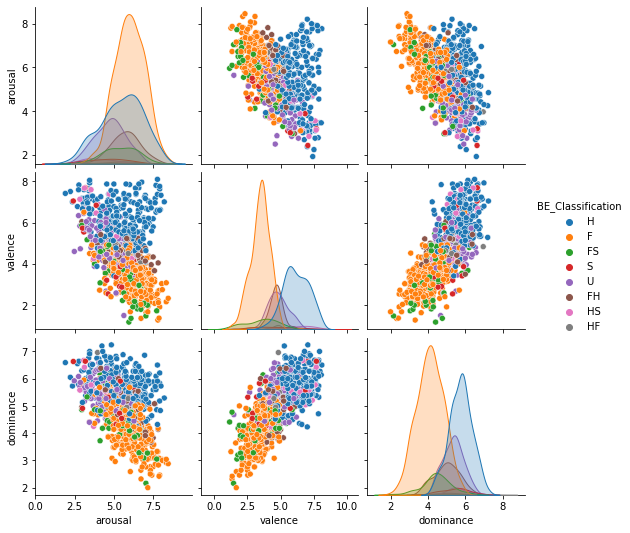

In [5]:
dfPair = df.iloc[:, 4:8]
dfPair.head()
sns.pairplot(dfPair, hue="BE_Classification") 

In [8]:
df1 = scaledDf[["arousal","dynamics_rms_mean"]]
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,arousal,dynamics_rms_mean
arousal,1.000000,0.430811
dynamics_rms_mean,0.430811,1.000000


In [9]:
scaledDf

,arousal,valence,dominance,dynamics_rms_mean,dynamics_rms_std,rhythm_attacktime_mean,rhythm_tempo_mean,rhythm_tempo_std,rhythm_pulseclarity_mean,rhythm_eventdensity_mean,...,timbre_lowenergy_std,timbre_spectralflux_mean,timbre_spectralflux_std,pitch_pitch_mean,tonal_keyclarity_mean,tonal_keyclarity_std,tonal_mode_mean,tonal_mode_std,tonal_hcdf_mean,tonal_hcdf_std
0,0.347021,0.776316,0.711832,0.122978,0.117740,0.051217,0.439822,0.012797,0.220125,0.176471,...,0.335939,0.134705,0.070679,0.206011,0.516918,0.286804,0.574507,0.508362,0.167954,0.218309
1,0.652400,0.296053,0.295802,0.099422,0.107828,0.037285,0.479631,0.496218,0.171065,0.220588,...,0.645832,0.203858,0.106516,0.252204,0.635515,0.398061,0.588421,0.742350,0.298956,0.218103
2,0.506651,0.440789,0.425573,0.087254,0.103867,0.068410,0.639954,0.179055,0.317891,0.382353,...,0.539169,0.138830,0.081974,0.216708,0.543738,0.429740,0.568621,0.240946,0.120885,0.174737
3,0.548294,0.480263,0.545802,0.103992,0.134379,0.042033,0.484913,0.485126,0.212141,0.264706,...,0.581285,0.168087,0.106586,0.218940,0.749226,0.230050,0.462012,0.490683,0.189204,0.164961
4,0.707345,0.438048,0.358779,0.120006,0.059853,0.058306,0.552794,0.236969,0.277470,0.411765,...,0.301156,0.191831,0.048808,0.187749,0.549472,0.314861,0.716657,0.655168,0.188338,0.149962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.516484,0.860197,0.604962,0.143337,0.101253,0.022053,0.775843,0.044821,0.183254,0.161765,...,0.436489,0.170868,0.086272,0.166039,0.746644,0.335323,0.573135,0.711551,0.138557,0.241691
931,0.872759,0.836075,0.708015,0.226747,0.260889,0.045320,0.696687,0.005675,0.592805,0.470588,...,0.589924,0.510105,0.331794,0.229720,0.606857,0.425452,0.499972,0.656759,0.414654,0.786798
932,0.700983,0.824013,0.770992,0.123030,0.173572,0.041992,0.613370,0.388297,0.146129,0.205882,...,0.632748,0.224257,0.211516,0.229219,0.662354,0.490158,0.363041,0.462807,0.253389,0.556021
933,0.582996,0.861842,0.814885,0.219580,0.111945,0.116520,0.649841,0.548354,0.191010,0.279412,...,0.505461,0.199558,0.101838,0.251412,0.714805,0.283779,0.451452,0.637426,0.147114,0.195331
